# Clustering

Clustering is a Machine Learning technique that involves the grouping of data points. ... In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features

# Clustering Methods :
* Density-Based Methods : These methods consider the clusters as the dense region having some similarity and different from the lower dense region of the space. These methods have good accuracy and ability to merge two clusters.Example DBSCAN (Density-Based Spatial Clustering of Applications with Noise) , OPTICS (Ordering Points to Identify Clustering Structure) etc.
* Hierarchical Based Methods : The clusters formed in this method forms a tree-type structure based on the hierarchy. New clusters are formed using the previously formed one. It is divided into two category
Agglomerative (bottom up approach)
Divisive (top down approach)
examples CURE (Clustering Using Representatives), BIRCH (Balanced Iterative Reducing Clustering and using Hierarchies) etc.

* Partitioning Methods : These methods partition the objects into k clusters and each partition forms one cluster. This method is used to optimize an objective criterion similarity function such as when the distance is a major parameter example K-means, CLARANS (Clustering Large Applications based upon Randomized Search) etc.
* Grid-based Methods : In this method the data space is formulated into a finite number of cells that form a grid-like structure. All the clustering operation done on these grids are fast and independent of the number of data objects example STING (Statistical Information Grid), wave cluster, CLIQUE (CLustering In Quest) etc.

### Read more 
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68#:~:text=Clustering%20is%20a%20Machine%20Learning,the%20grouping%20of%20data%20points.&text=In%20theory%2C%20data%20points%20that,dissimilar%20properties%20and%2For%20features.

https://machinelearningmastery.com/clustering-algorithms-with-python/

# Applications of Clustering
* Recommendation engines
* Market segmentation
* Social network analysis
* Search result grouping
* Medical imaging
* Image segmentation
* Anomaly detection

# Clustering using KMeans Algorithm

Kmeans(Lloyd Forgy Algorithm)
MiniBatchKmeans
### Benefits
Fast and Scalable
### Demerits
* Need to know th number of clusters
* Problem of having to pre-define the number of clusters.
        * Elbow Method/Silhoutte Method
        * Hierarchical Clustering:
* Varying sizes and different densities may affect performances scaling

### Terms
* k = number of clusters
* .label_: index of cluster
* .clustercenters: centroid
* .inertia_: performance metric of mean sq distance btwn each instance and its closest centroid
* .score:

### Task
Segment Countries into their respective Continents
Unsupervised ML
https://developers.google.com/public-data/docs/canonical/countries_csv

In [81]:
import pandas as pd
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
# Load Dataset
df = pd.read_csv("countries.csv")
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace =True)
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [83]:
# Check For Dtypes
df.dtypes

country       object
latitude     float64
longitude    float64
name          object
dtype: object

In [84]:
# Check For Missing NAN
df.isnull().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [85]:
# Drop Na
df = df.dropna()


In [86]:
# Columns Consistency
df.columns

Index(['country', 'latitude', 'longitude', 'name'], dtype='object')

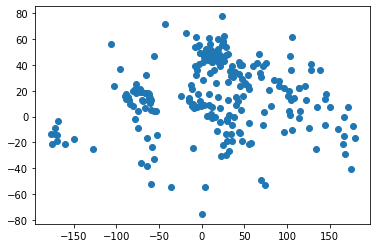

In [87]:
# Plot of our Countries 
plt.scatter(df['longitude'],df['latitude'])

# Kmeans¶

* 1 To begin, we first select a number of classes/groups to use and randomly initialize their respective center points.
* 2 Each data point is classified by computing the distance between that point and each group center, and then classifying the point to be in the group whose center is closest to it.
* 3 Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.
* 4 Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations. 

In [88]:
from sklearn.cluster import KMeans

In [89]:
# By Assumation we have 7 continents
# k = 7
km = KMeans(n_clusters=3)

In [90]:
# Prep
xfeatures = df[['longitude','latitude']]

In [91]:
# Fit n Predict
clusters = km.fit_predict(xfeatures)

In [92]:
# Get all the Labels(Clusters)
km.labels_

array([2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       2])

In [93]:
clusters

array([2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       2])

In [94]:
# Check if predicted clusters is the same as our labels
clusters is km.labels_

True

In [95]:
# Centroid/Center
km.cluster_centers_

array([[120.63303011,   6.16733752],
       [-84.48496644,   5.67121831],
       [ 21.58809362,  24.84002418]])

In [96]:
# Store and Map
df['cluster_continents'] = clusters
df.head(25)

,country,latitude,longitude,name,cluster_continents
0,AD,42.546245,1.601554,Andorra,2
1,AE,23.424076,53.847818,United Arab Emirates,2
2,AF,33.939110,67.709953,Afghanistan,2
3,AG,17.060816,-61.796428,Antigua and Barbuda,1
4,AI,18.220554,-63.068615,Anguilla,1
5,AL,41.153332,20.168331,Albania,2
6,AM,40.069099,45.038189,Armenia,2
7,AN,12.226079,-69.060087,Netherlands Antilles,1
8,AO,-11.202692,17.873887,Angola,2
9,AQ,-75.250973,-0.071389,Antarctica,2


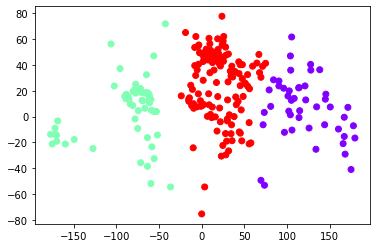

In [97]:
# Plot of our clusters
plt.scatter(df['longitude'],df['latitude'],c=df['cluster_continents'],cmap='rainbow')

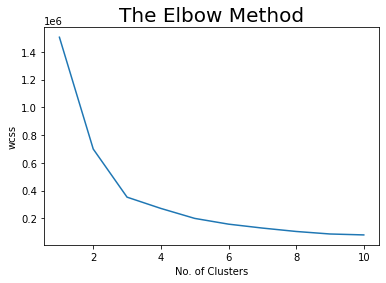

In [98]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(xfeatures)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# Hierarchical Clustering

* Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points.
* Hierarchical clustering also groups together the data points with similar characteristics. 
* Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

### Types of clustering 
* There are two types of hierarchical clustering: Agglomerative and Divisive.
* Agglomerative  Data points are clustered using a bottom-up approach starting with individual data points,
* Divisive top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters

 focus on agglomerative clustering that involves the bottom-up approach.

### Steps to Perform Hierarchical Clustering

* At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
* Form a cluster by joining the two closest data points resulting in K-1 clusters.
* Form more clusters by joining the two closest clusters resulting in K-2 clusters.
* Repeat the above three steps until one big cluster is formed.
* Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

In [100]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

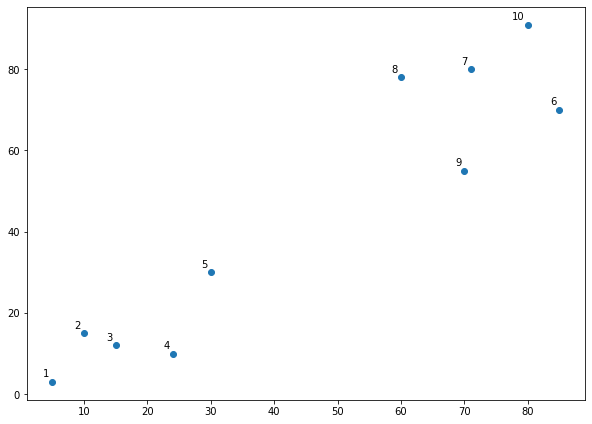

In [25]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

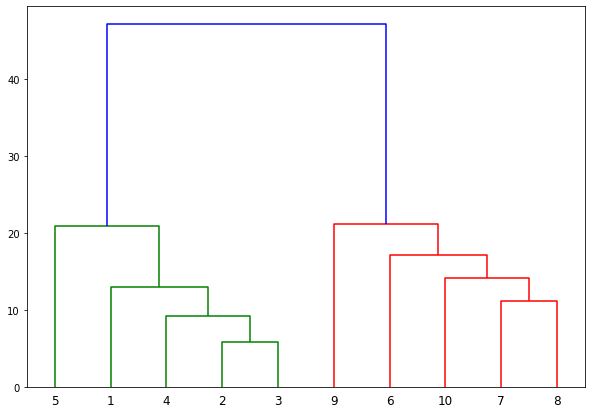

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at Graph1, we can see that points 2 and 3 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first.

### Hierarchical Clustering via Scikit-Learn

In [36]:
#  segment customers into different groups based on their shopping trends.

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [106]:
customer_data = pd.read_csv('shop.csv')
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [107]:
customer_data.shape

(200, 5)

In [109]:
data = customer_data.iloc[:, 3:5].values
data[0]

array([15, 39], dtype=int64)

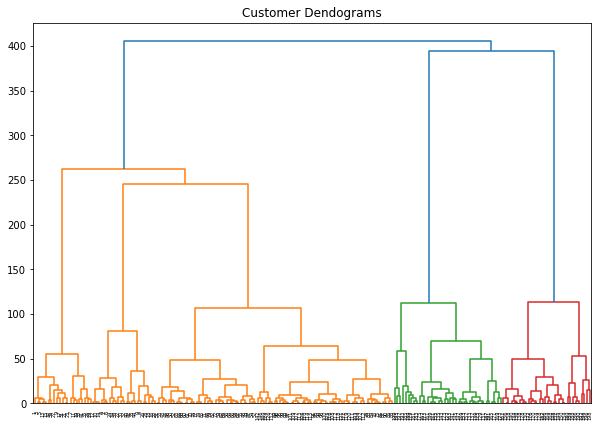

In [110]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [111]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

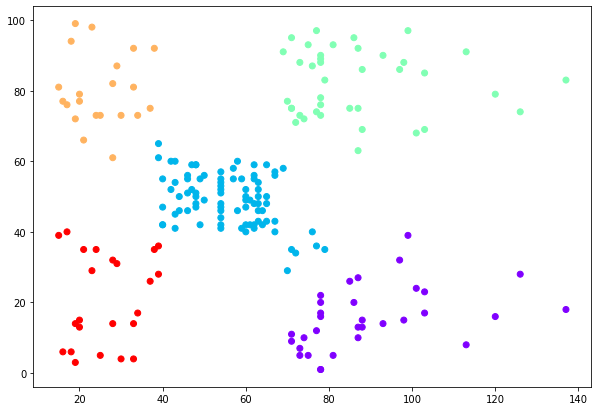

In [112]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')